In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import xgboost as xgb




/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("/kaggle/input/mydata/MYDATA.csv")

# data preprocessing


In [3]:

# Define the input features
num_features = ['age', 'MarketValue', 'Fee', 'YearOfTranfert', 'Height', 'Squad', 'Appearances', 'Goals', 'Assists', 'OwnGoals', 'SubsON', 'SubsOFF', 'YellowCards', 'SecondYellowCards', 'RedCards', 'PenaltyGoals', 'MinutesPerGoal', 'MinutesPlayed']
cat_features = ['position', 'Country', 'PreviousTeam', 'LeagueOfPreviousTeam', 'CountryOfPreviousTeam', 'NewTeam', 'LeagueOfNewTeam', 'CountryOfNewTeam']


In [4]:
# Define the input features
X = data.drop(['name', 'PPG'], axis=1)
y = data['PPG']*data['Goals']*data['MarketValue']

# Encode the categorical features
cat_encoders = {}
for feature in cat_features:
    cat_encoders[feature] = LabelEncoder()
    X[feature] = cat_encoders[feature].fit_transform(X[feature])



In [5]:
X.NewTeam.value_counts()
#data.NewTeam.value_counts()

705     256
1380    191
27      189
60      178
1364    170
       ... 
1265      1
48        1
190       1
1182      1
1110      1
Name: NewTeam, Length: 1499, dtype: int64

In [6]:
X=X.drop('PlaceOfBirth',axis=1)
X=X.drop('Unnamed: 0',axis=1)

In [7]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500,learning_rate=0.1,max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Evaluate the model
print("XGBoost Regression R^2 Score:", xgb_model.score(X_test, y_test))



XGBoost Regression R^2 Score: 0.9695167430798184


In [71]:
new_data = pd.DataFrame({
    'age': [25],
    'position': ['Centre-Forward'],
    'Country': [''],
    'MarketValue': [150],
    'PreviousTeam': [''],
    'LeagueOfPreviousTeam': [''],
    'CountryOfPreviousTeam': [''],
    'Fee': [155],
    'YearOfTranfert': [2024],
    'NewTeam': ['Real Madrid'],
    'LeagueOfNewTeam': ['Laliga'],
    'CountryOfNewTeam': ['Spain'],
    'Height': [185],
    'Squad': [43],
    'Appearances': [43],
    #'PPG': [0.9],
    'Goals': [31],
    'Assists': [6],
    'OwnGoals': [0],
    'SubsON': [1],
    'SubsOFF': [12],
    'YellowCards': [1],
    'SecondYellowCards': [0],
    'RedCards': [0],
    'PenaltyGoals': [9],
    'MinutesPerGoal': [117],
    'MinutesPlayed': [3631]
})
for feature in cat_features:
    cat_encoders[feature] = LabelEncoder()
    new_data[feature] = cat_encoders[feature].fit_transform(new_data[feature])



In [72]:

# Make predictions
xgb_predictions = xgb_model.predict(new_data)


In [73]:
"""for feature in cat_features:
  encoder = LabelEncoder()
  new_data[feature] = encoder.fit_transform(new_data[feature])

new_player_pred = rf_model.predict(new_data)
print("Predicted player name:", new_player_pred[0])"""

'for feature in cat_features:\n  encoder = LabelEncoder()\n  new_data[feature] = encoder.fit_transform(new_data[feature])\n\nnew_player_pred = rf_model.predict(new_data)\nprint("Predicted player name:", new_player_pred[0])'

In [74]:
#X_test_encoded = pd.DataFrame(index=X_test.index)
X_test_encoded=X
# Encode the categorical features in X_test
for feature in cat_features:
    encoder = LabelEncoder()
    X_test_encoded[feature] = encoder.fit_transform(X_test_encoded[feature])

# Concatenate the encoded X_test with the numeric X_test
#X_test_all = pd.concat([X_test_encoded, X_test[num_features]], axis=1)

# Get the predicted PPG values for all players in X_test
predicted_ppg = xgb_model.predict(X_test_encoded)

# Find the index of the player in X_test with the closest predicted PPG to new_data
closest_indices = np.argsort(abs(predicted_ppg - xgb_model.predict(new_data)))[:1000]
print(closest_indices)


[ 7113  8844 10609  5479    29 22486    20  5478  3706  5498    10  8846
  1867  5468     0 14011 15750 17550  3708  5483  1865  7122    16 14016
 27195  8852  8862  8847 15751  3702 14021    50  7124  7114 12389 20863
     9  5471 20864 17557 19242 19240  1868 22487    11  7135  1882 25686
  7131 19237    51 10722  1883  7175 12387  7196 19241  1878  7137  5509
  5499  8868 10611 17554 15753 19247 25685  8849 15756 10616 14030 22493
 10608 10634  7123 15759 27196 12385 24110 14019  1877 15752 12395  3739
 22495  7162 14015 17558 14013  3790  1933 15772  5503    83  5579 14012
 14038  3745 14014  3705  5505  8850    22  8855  5508  3724  3727 22490
  5469 25695  8881  3726     1  5470 24106    63  3748  7188 10630 14036
  3797  3709  7195 15774 22488  7117 14029   134 22520    58  1879    56
  5519  5476  7148 20862  7116  3732 22492 22512  1874 14027    25    95
  8858  3718  7220 20866  8857 17570  1872 27205    44    26  2012 17564
  8869  7128 12405 24121 17621  8924  3714  5647  7

In [78]:
# Get the name of the closest player and print it out as the recommendation
print("Top Recommendations:")
names_set = set()
for i in closest_indices:
    if (
        data.iloc[i]['age'] >=19
        and data.iloc[i]['age'] <=25
        and data.iloc[i]['position'] in ['Centre-Forward','Attacking Midfield']
        and data.iloc[i]['YearOfTranfert'] in [2022, 2021, 2020, 2019, 2018]
    ):
        name = data.iloc[i]['name']
        if name not in names_set:
            print(name)
            names_set.add(name)



Top Recommendations:
Kylian Mbapp? 
Darwin N??z 
Timo Werner 
Erling Haaland 
Dusan Vlahovic 
Bruno Fernandes 
Kai Havertz 
Tammy Abraham 
Talisca 
Michy Batshuayi 
Andr? Silva 
Moussa Demb?? 
Alexander S?rloth 
Gabriel Barbosa 
Victor Osimhen 
Gabriel Jesus 
Charles De Ketelaere 
Jonathan David 
Carlos Vin?ius 
Mariano D?z 
Dani Olmo 
Gianluca Scamacca 
Arthur Cabral 
Pedro 
Lautaro Mart?ez 
Amine Gouiri 
Paco Alc?er 
Julian Brandt 
Lucas Paquet? 
Juli? ?lvarez 
Taiwo Awoniyi 
Richarlison 
Maxi G?ez 
Umar Sadiq 
Dominik Szoboszlai 
Mario Pasalic 
Aleksey Miranchuk 
Martin ?egaard 
Yuri Alberto 
Krzysztof Piatek 
Alexander Isak 
Nicol? Zaniolo 
Hugo Ekitik? 
Moise Kean 
Keita Bald? 
Patson Daka 
Joshua Zirkzee 
Nikola Vlasic 
Adam Hlozek 
Vitinha 
Patrik Schick 
S?astien Haller 
Ollie Watkins 
F?io Vieira 
Matheus Cunha 
Andrea Pinamonti 
Wout Weghorst 
Pity Mart?ez 
Aleksandar Mitrovi? 
Thomas Lemar 
Patrick Cutrone 
Santi Mina 
Giovanni Simeone 
Taty Castellanos 
Simone Verdi 
Andrea

In [76]:
type(closest_indices)

numpy.ndarray

In [14]:




# Get the name of the closest player and print it out as the recommendation
print("Top 3 Recommendations:")
for i in closest_indices:
    if(data.iloc[i]['age']<=35 and data.iloc[i]['position']=='Defensive Midfield' and data.iloc[i]['YearOfTranfert'] in [2022,2021,2020,2019,2018,2017]):
        print(data.iloc[i]['name'])


Top 3 Recommendations:
Rodri 
Jorginho 
Fabinho 
Aur?ien Tchouam?i 
Bryan Cristante 
Bryan Cristante 
Jorginho 
Emre Can 
Thomas Partey 
Danilo 
Tomas Soucek 
Leandro Paredes 
Bruno Guimar?s 
Jordan Veretout 
Sandro Tonali 
Grzegorz Krychowiak 
Tiemou? Bakayoko 
Jordan Veretout 


Mean Squared Error (MSE): 925.195533519121
R-squared (R²): 0.9695167430798184


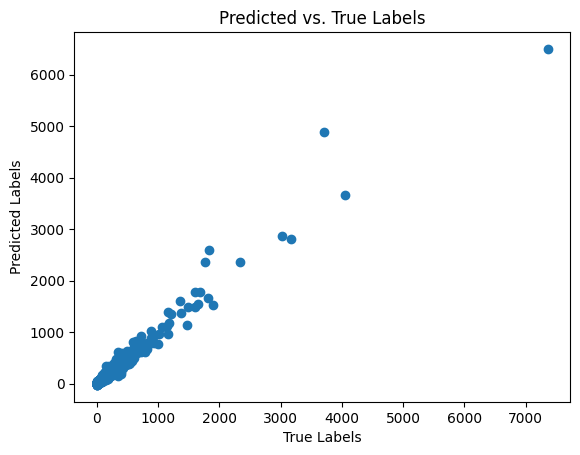

In [15]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have trained your XGBoost model and have the predictions and true labels
predictions = xgb_model.predict(X_test)
true_labels = y_test

# Regression evaluation metrics
mse = mean_squared_error(true_labels, predictions)
r2 = r2_score(true_labels, predictions)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Plot the predicted vs. true labels for regression
plt.scatter(true_labels, predictions)
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("Predicted vs. True Labels")
plt.show()


In [16]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns

# Assuming you have trained your XGBoost model and have the predictions and true labels
predictions = xgb_model.predict(X_test)
true_labels = y_test

# Convert continuous true labels to binary class labels
binary_true_labels = np.where(true_labels >= threshold, 1, 0)

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(binary_true_labels, predictions)

# Calculate the area under the ROC curve (AUC-ROC)
auc_roc = roc_auc_score(binary_true_labels, predictions)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



NameError: name 'threshold' is not defined

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(binary_true_labels, np.round(predictions))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have true labels and predicted scores from your XGBoost model
predictions = xgb_model.predict(X_test)
true_labels = y_test

# Convert true labels to binary labels using a threshold of 0.5
true_labels_binary = np.array(true_labels) >= 0.5

# Convert predicted scores to binary labels using a threshold of 0.5
predicted_labels = np.array(predictions) >= 0.5

# Calculate the evaluation metrics
accuracy = accuracy_score(true_labels_binary, predicted_labels)
precision = precision_score(true_labels_binary, predicted_labels)
recall = recall_score(true_labels_binary, predicted_labels)
f1 = f1_score(true_labels_binary, predicted_labels)
roc_auc = roc_auc_score(true_labels_binary, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming you have true labels and predicted scores from your XGBoost model
true_labels = [0, 1, 1, 0, 1, 0]
predicted_scores = [0.2, 0.6, 0.8, 0.3, 0.9, 0.5]

predictions = xgb_model.predict(X_test)
true_labels = y_test

# Define a threshold for binary classification
threshold = 0.5

# Convert continuous values to binary labels
true_labels = [1 if label > threshold else 0 for label in true_labels]
predicted_labels = [1 if score > threshold else 0 for score in predicted_scores]

precision, recall, thresholds = precision_recall_curve(true_labels, predicted_labels)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [ ]:
print("Unique values in true_labels:", np.unique(true_labels))
print("Unique values in predicted_scores:", np.unique(predicted_scores))

In [ ]:
import matplotlib.pyplot as plt

iterations = [1, 2, 3, 4, 5]  # Iteration or epoch numbers
f1_scores = [0.7, 0.78, 0.82, 0.85, 0.88]  # F1 scores

plt.plot(iterations, f1_scores, 'o-')
plt.xlabel('Iteration')
plt.ylabel('F1 Score')
plt.title('F1 Score Evolution')
plt.show()


# The most import features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Get feature importances from the trained model
feature_importances = xgb_model.feature_importances_

# Get names of the features
feature_names = X.columns

# Create a datafr%ame with feature names and importance scores
feature_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort the dataframe by importance score in descending order
feature_df = feature_df.sort_values(by='importance', ascending=False)

# Plot the feature importance using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
print(data.position.value_counts())
print(X.position.value_counts())

# Best Hyperparameters

In [ ]:
"""from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf_model = RandomForestRegressor()

# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model found by the grid search
best_rf_model = grid_search.best_estimator_
"""

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Possible values for n_estimators
    'max_depth': [3, 5, 7],  # Possible values for max_depth
    'learning_rate': [0.1, 0.01, 0.001]  # Possible values for learning_rate
}

# Define the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best R^2 Score:", best_score)

# Calculate the score for different hyperparameter combinations
for params, mean_score, std_score in zip(grid_search.cv_results_['params'],
                                         grid_search.cv_results_['mean_test_score'],
                                         grid_search.cv_results_['std_test_score']):
    print("Hyperparameters:", params)
    print("Mean R^2 Score:", mean_score)
    print("Standard Deviation:", std_score)
    print()

# Train the model with the best hyperparameters
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
xgb_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = xgb_model.score(X_test, y_test)
print("XGBoost Regression R^2 Score:", test_score)


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
import numpy as np
from tabulate import tabulate

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Possible values for n_estimators
    'max_depth': [3, 5, 7],  # Possible values for max_depth
    'learning_rate': [0.1, 0.01, 0.001]  # Possible values for learning_rate
}

# Define the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Store the results in a table
table_data = []
for params, mean_score, std_score in zip(grid_search.cv_results_['params'],
                                         grid_search.cv_results_['mean_test_score'],
                                         grid_search.cv_results_['std_test_score']):
    table_data.append([params['n_estimators'], params['max_depth'], params['learning_rate'], mean_score, std_score])

# Generate the table
table_headers = ['n_estimators', 'max_depth', 'learning_rate', 'Mean R^2 Score', 'Standard Deviation']
table = tabulate(table_data, headers=table_headers, floatfmt=".4f", tablefmt="grid")

print("Best Hyperparameters:", best_params)
print("Best R^2 Score:", best_score)
print("\nResults Table:")
print(table)

# Train the model with the best hyperparameters
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
xgb_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = xgb_model.score(X_test, y_test)
print("\nXGBoost Regression R^2 Score:", test_score)
